<a href="https://colab.research.google.com/github/rahulrajpr/AdvancedFeatureEngineering/blob/Transformation/MathematicalTransformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Mathematical Transformations

1. Log
2. Reciprocal
3. Exponential
4. BoxCox
5. Yeo-jonhson

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
!pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
path = '/content/drive/MyDrive/Udemy Courses - 2.0/Feature Engineering/Dataset/houseprice/houseprice.csv'
data = pd.read_csv(path)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
sel_cols = ['LotArea', 'GrLivArea','SalePrice']

In [12]:
data = data[sel_cols]

In [13]:
data.nunique()

LotArea      1073
GrLivArea     861
SalePrice     663
dtype: int64

In [14]:
X = data.drop('SalePrice', axis =1)
y = data['SalePrice']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7, random_state = 100)

In [30]:
def diagnostic_plots(df, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

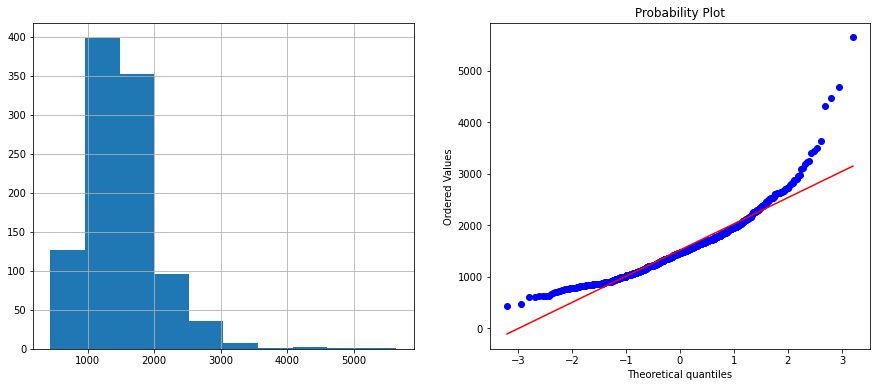

In [31]:
diagnostic_plots(X_train,'GrLivArea')

### Log Transformation

In [32]:
from feature_engine.transformation import LogTransformer

In [33]:
log_trans = LogTransformer()

In [34]:
log_trans.fit(X_train)

LogTransformer()

In [36]:
log_trans.variables_

['LotArea', 'GrLivArea']

In [37]:
log_trans.transform(X_train)

,LotArea,GrLivArea
318,9.200290,7.880804
239,9.075780,7.304516
986,8.577347,7.399398
1416,9.336092,7.736307
390,9.036582,7.220374
...,...,...
802,9.011767,7.283448
53,10.825184,7.518607
350,8.964440,7.533159
79,9.253400,7.114769


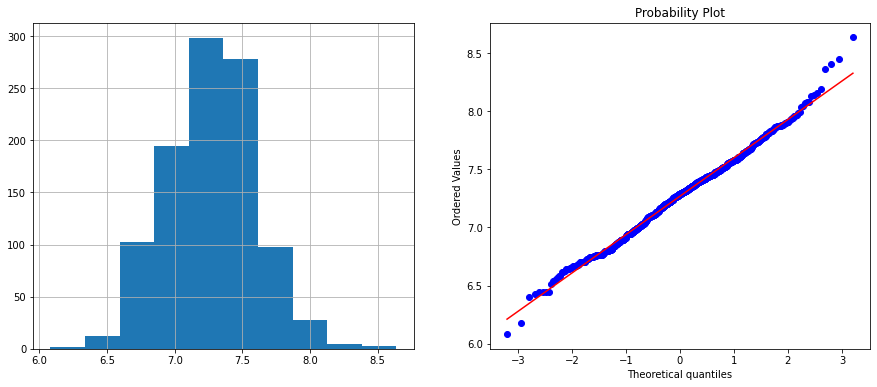

In [38]:
diagnostic_plots(log_trans.transform(X_train),'GrLivArea')

### Reciprocal Transformation

In [39]:
from feature_engine.transformation import ReciprocalTransformer

In [40]:
rec_trans = ReciprocalTransformer()

In [41]:
rec_trans.fit(X_train)

ReciprocalTransformer()

In [42]:
rec_trans.transform(X_train)

,LotArea,GrLivArea
318,0.000101,0.000378
239,0.000114,0.000672
986,0.000188,0.000612
1416,0.000088,0.000437
390,0.000119,0.000732
...,...,...
802,0.000122,0.000687
53,0.000020,0.000543
350,0.000128,0.000535
79,0.000096,0.000813


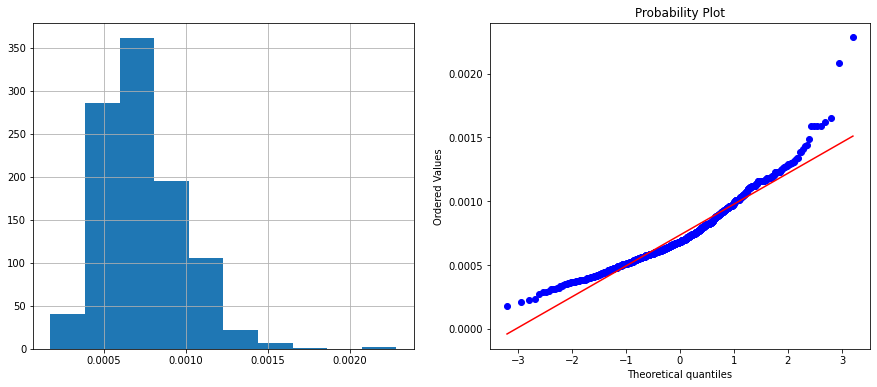

In [43]:
diagnostic_plots(rec_trans.transform(X_train),'GrLivArea')

### Exponential Transformation

In [44]:
from feature_engine.transformation import PowerTransformer

In [45]:
exp_trans = PowerTransformer(exp = 0.5)

In [46]:
exp_trans.fit(X_train)

PowerTransformer()

In [47]:
exp_trans.transform(X_train)

,LotArea,GrLivArea
318,99.498744,51.439285
239,93.493315,38.561639
986,72.869747,40.435133
1416,106.489436,47.853944
390,91.678787,36.972963
...,...,...
802,90.548330,38.157568
53,224.211953,42.918527
350,88.430764,43.231933
79,102.176318,35.071356


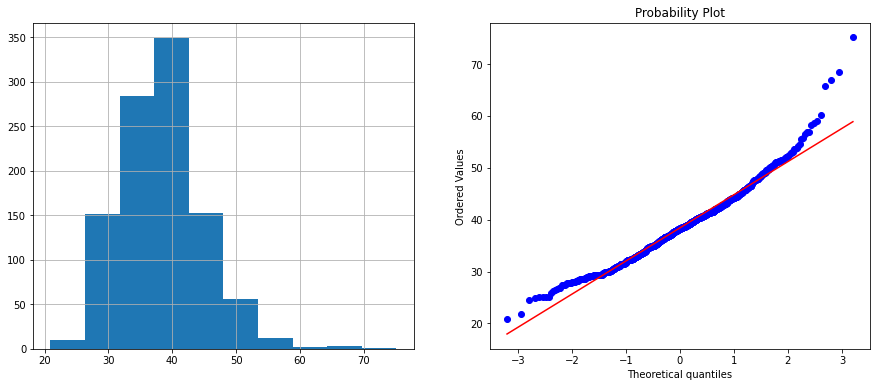

In [48]:
diagnostic_plots(exp_trans.transform(X_train),'GrLivArea')

### BoxCox Transformation

In [49]:
from feature_engine.transformation import BoxCoxTransformer

In [50]:
boxcox_trans = BoxCoxTransformer()

In [51]:
boxcox_trans.fit(X_train)

BoxCoxTransformer()

In [52]:
boxcox_trans.lambda_dict_

{'LotArea': 0.03181734286787273, 'GrLivArea': -0.06777019584290855}

In [53]:
boxcox_trans.transform(X_train)

,LotArea,GrLivArea
318,10.688488,6.105837
239,10.521965,5.761330
986,9.861914,5.818980
1416,10.870867,6.020716
390,10.469677,5.709894
...,...,...
802,10.436609,5.748479
53,12.923245,5.890888
350,10.373613,5.899626
79,10.759720,5.644922


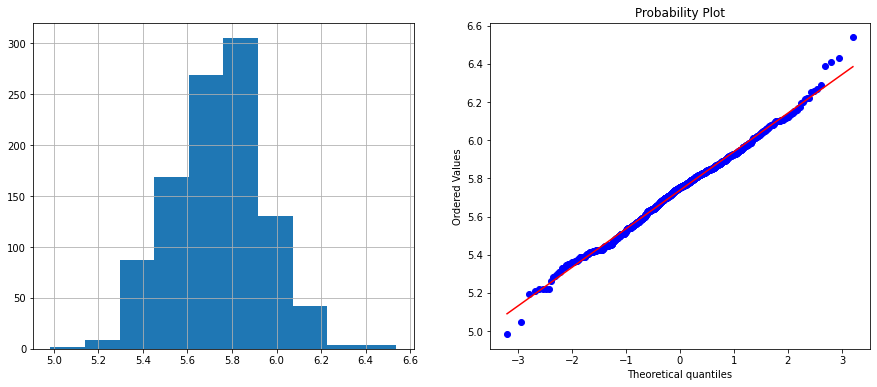

In [54]:
diagnostic_plots(boxcox_trans.transform(X_train),'GrLivArea')

### Yoe-Johnson Transformation

In [55]:
from feature_engine.transformation import YeoJohnsonTransformer

In [56]:
yj_trans = YeoJohnsonTransformer()

In [57]:
yj_trans.fit(X_train)

YeoJohnsonTransformer()

In [58]:
yj_trans.lambda_dict_

{'LotArea': 0.031691289033017774, 'GrLivArea': -0.06854551628378953}

In [59]:
yj_trans.transform(X_train)

,LotArea,GrLivArea
318,10.682126,6.089089
239,10.515812,5.746791
986,9.856589,5.804074
1416,10.864275,6.004518
390,10.463589,5.695682
...,...,...
802,10.430563,5.734021
53,12.913955,5.875523
350,10.367646,5.884205
79,10.753268,5.631124


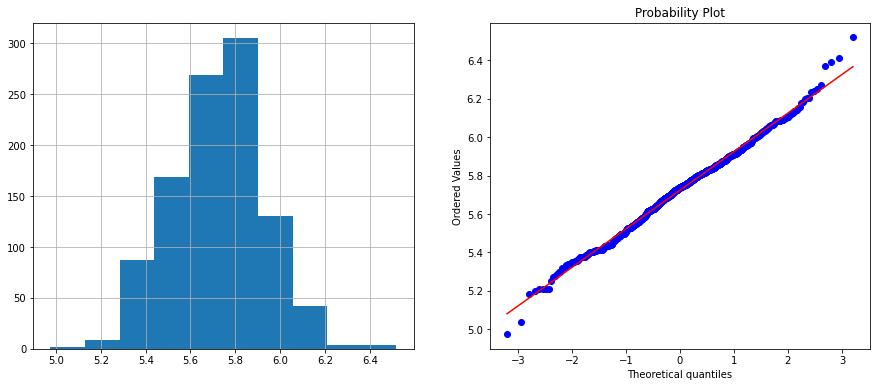

In [60]:
diagnostic_plots(yj_trans.transform(X_train),'GrLivArea')